# Exploration des données généréees par les smart grids avec python

L'analyse exploratoire des données (EDA) est un pilier important de la science des données, une étape essentielle requise pour réaliser chaque projet, quel que soit le domaine ou le type de données avec lequel nous travaillons. C'est une analyse exploratoire qui nous donne une idée du travail supplémentaire à effectuer pour quantifier et extraire des informations de nos données. Il nous informe également sur ceque devrait être le produit final de notre processus analytique.
Le cadre ou plutout le framework que nous avons suivre, illustré ci-dessous, consiste en une phase de préparation et une phase d'exploration. Chaque phase comporte plusieurs étapes que nous allons essayer de parcourir afin d'aboutir dans notre analyse.

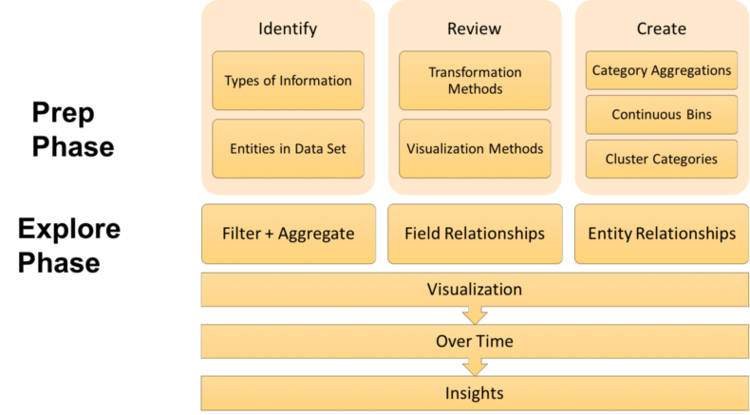

In [1]:
from IPython.display import Image
Image("framework_large.png")

Notre étude aura quatre parties. Les deux premiers couvriront la phase de préparation, et les deux autres postes couvriront la phase d'exploration.

* La partie 1 présentera le framework, le dataset auquel nous allons l'appliquer, et les deux premières étapes de la phase de préparation (Identifier et Réviser) qui servent à nous préparer, l'humain, à explorer nos données.</br> 
* La deuxième partie couvrira la troisième étape de la phase de préparation (Créer), qui passera de la préparation de l'analyst  à la préparation des données à explorer. 
* La partie 3 débutera la phase d'exploration, dans laquelle nous montrerons différentes façons d'agréger visuellement, de faire pivoter et d'identifier les relations entre les champs de nos données.</br> 
* La partie 4 continuera notre exploration des relations, tirant parti de l'analyse des graphes pour examiner les connexions entre les entités de nos données.

In [2]:
import pandas as pd
header_smart=pd.read_excel('smartgrid.xlsx',header=None, sheet_name=0,usecols=1)
header_smart.head(7)# shows the file header

,0,1
0,Title:,SGIG Program Advanced Metering Infrastructure ...
1,Source:,http://www.smartgrid.gov/
2,Time and Date:,2015-05-01 11:57:00
3,Content:,This file contains smart grid data (current as...
4,NaN,All of the data in this file is considered pub...
5,NaN,This data provides details regarding the deplo...
6,NaN,Blank or zero in a data field indicates that t...


Notre fichier de données contient plusieurs feuilles qui sont différentes en nombres des colonnes et des informations qu'elles présentent

In [3]:
xlsx = pd.ExcelFile('smartgrid.xlsx')
smart_sheets = []
i=0
sheet_names=xlsx.sheet_names
for sheet in sheet_names:
    smart_sheets.append(pd.read_excel('smartgrid.xlsx', sheet_name=i,skiprows=10))
    i=i+1
print('les feuilles du fichiers sont: ')
for i in sheet_names:
    print('',i,'\t')
print('par exemple les 5 ligne de la  feuille AMI: ')
smart_sheets[0].head()
#smart_sheets[0].info()


les feuilles du fichiers sont: 
 AMI 	
 Customer System 	
 DER 	
 Distribution 	
 Transmission 	
 Data Descriptions 	
par exemple les 5 ligne de la  feuille AMI: 


,[Type],[Type].1,[Type].2,[Last Reporting Date],[Last Reporting Date].1,[Last Reporting Date].2,[Last Reporting Date].3,[Type].3,[Type].4,[Type].5,...,[Count of units installed].2,[Count of units installed].3,[Count of units installed].4,[Count of units installed].5,[Count of units installed].6,[Count of units installed].7,[$],[$].1,[$].2,[$].3
0,09-0007-01,SGIG,City of Fort Collins,2014.0,Q4,December,31.0,WECC,Municipal Utility and Public Utility District,NaN,...,7890.0,0.0,68731.0,68731.0,0.0,68731.0,1.159265e+07,1589786.0,4350804.0,8986512.00
1,09-0007-02,SGIG,City of Fort Collins - City of Fountain,2014.0,Q3,September,30.0,WECC,Municipal Utility and Public Utility District,Mesh Network,...,919.0,35.0,15723.0,15573.0,15723.0,15723.0,2.953168e+06,312500.0,0.0,1026344.00
2,09-0008,SGIG,Minnesota Power,2013.0,Q4,December,31.0,MRO,Investor Owned Utility,RF Fixed Pt MPt,...,187.0,NaN,8030.0,1571.0,8030.0,NaN,1.593327e+06,107799.0,531595.0,191896.00
3,09-0014,SGIG,Baltimore Gas and Electric Company,2013.0,Q4,December,31.0,RFC,Investor Owned Utility,Mesh Network,...,0.0,NaN,575081.0,533691.0,0.0,575081.0,1.291911e+08,7952230.7,56578906.0,47543978.38
4,09-0015,SGIG,"City of Naperville, IL",2014.0,Q2,June,30.0,RFC,Municipal Utility and Public Utility District,Mesh Network,...,4866.0,22.0,58930.0,54042.0,58663.0,58663.0,1.008082e+07,363624.0,2107122.0,5811930.00


On doit d'abord renommer les noms des colonnes, supprimer les colonnes dont nous n'avons pas besoin et les enregistrements en double, puis on va trier les données par 'Year of PeriodEndDate' et 'Month of PeriodEndDate'et 'TotalCustomerCount'. Mais on doit d'abord convertir les valeurs du champ 'Month of PeriodEndDate' en valeurs entières. Dans tout ce qui suit on considère seulement la feuille AMI


In [4]:
import xlrd
ExcelFileName= 'smartgrid.xlsx'
workbook = xlrd.open_workbook(ExcelFileName)
smart_selected_row=[]
for j in range(0,5,1):
    worksheet = workbook.sheet_by_name(sheet_names[j]) # We need to read the data 
    num_rows = worksheet.nrows #Number of Rows
    num_cols = worksheet.ncols #Number of Columns
    result_data =[]
    for curr_row in range(0, num_rows, 1):
        row_data = []
        for curr_col in range(0, num_cols, 1):
            data = worksheet.cell_value(curr_row, curr_col) # Read the data in the current cell
            if data!='':
                row_data.append(data)
        result_data.append(row_data)
#for data in range(0,len(result_data),1):
    smart_selected_row.append(result_data)
#for i in range(0,len(smart_sheets),1) :
    smart_sheets[j].columns=result_data[9]
print('les noms des colonnes de la feuille AMI :')
print(smart_selected_row[0][9])
#print(smart_selected_row[1][9])
#print(smart_selected_row[2][9])
#print(smart_selected_row[3][9])
#print(smart_selected_row[4][9])

les noms des colonnes de la feuille AMI :
['ProjectId', 'ContractType', 'PrimeRecipient', 'Year of PeriodEndDate', 'Quarter of PeriodEndDate', 'Month of PeriodEndDate', 'Day of PeriodEndDate', 'NERC Region', 'Utility Type', 'AmiSmartMtrCommType', 'AmiSmartMtrBackHaulNetType', 'TotalCustomerCount', 'ResidentialCustomerCount', 'CommercialCustomerCount', 'IndustrialCustomerCount', 'AmiSmartMtrCount', 'ami_AmiSmartMtrTotalCount', 'ami_AmiSmartMtrResidentialCount', 'ami_AmiSmartMtrCommercialCount', 'ami_AmiSmartMtrIndustrialCount', 'ami_AmiIntervalReads', 'ami_AmiRemoteDisconnectMtrCount', 'ami_AmiOutageReportingMtrCount', 'ami_AmiTamperDetectionMtrCount', 'AmiSmartMtrCost', 'AmiCommEquipCost', 'AmiBackOfficeCost', 'AmiOtherCost']


In [5]:
ami_names_column=['ProjectId', 'ContractType', 'PrimeRecipient', 'Year of PeriodEndDate', 
                  'Quarter of PeriodEndDate', 'Month of PeriodEndDate', 'Day of PeriodEndDate', 
                  'NercRegion', 'UtilityType', 'AmiSmartMtrCommType', 'AmiSmartMtrBackHaulNetType', 
                  'TotalCustomerCount', 'ResidentialCustomerCount', 'CommercialCustomerCount', 
                  'IndustrialCustomerCount', 'AmiSmartMtrCount', 'ami_AmiSmartMtrTotalCount',
                  'ami_AmiSmartMtrResidentialCount', 'ami_AmiSmartMtrCommercialCount', 
                  'ami_AmiSmartMtrIndustrialCount', 'ami_AmiIntervalReads', 'ami_AmiRemoteDisconnectMtrCount',
                  'ami_AmiOutageReportingMtrCount', 'ami_AmiTamperDetectionMtrCount', 'AmiSmartMtrCost',
                  'AmiCommEquipCost','AmiBackOfficeCost', 'AmiOtherCost']
#rename the "NERG Region" to "NergRegion" in AMI spreadshee to smart_sheets[0].head()
#commun_columns list contains the commun columns between the five first sheets
commun_column=['ProjectId', 'ContractType', 'PrimeRecipient', 'Year of PeriodEndDate', 
                  'Quarter of PeriodEndDate', 'Month of PeriodEndDate', 'Day of PeriodEndDate', 
                  'NercRegion',  'UtilityType','TotalCustomerCount', 'ResidentialCustomerCount', 
               'CommercialCustomerCount', 'IndustrialCustomerCount']
#special_AMI_column contains the columns that are specific to AMI sheet
special_AMI_column=['AmiSmartMtrCommType', 'AmiSmartMtrBackHaulNetType','AmiSmartMtrCount', 'ami_AmiSmartMtrTotalCount', 
                    'ami_AmiSmartMtrResidentialCount', 'ami_AmiSmartMtrCommercialCount', 'ami_AmiSmartMtrIndustrialCount', 
                    'ami_AmiIntervalReads', 'ami_AmiRemoteDisconnectMtrCount', 'ami_AmiOutageReportingMtrCount',
                    'ami_AmiTamperDetectionMtrCount', 'AmiSmartMtrCost', 'AmiCommEquipCost', 'AmiBackOfficeCost',
                    'AmiOtherCost']
smart_sheets[0].columns=ami_names_column
smart_sheets[0].head()

,ProjectId,ContractType,PrimeRecipient,Year of PeriodEndDate,Quarter of PeriodEndDate,Month of PeriodEndDate,Day of PeriodEndDate,NercRegion,UtilityType,AmiSmartMtrCommType,...,ami_AmiSmartMtrCommercialCount,ami_AmiSmartMtrIndustrialCount,ami_AmiIntervalReads,ami_AmiRemoteDisconnectMtrCount,ami_AmiOutageReportingMtrCount,ami_AmiTamperDetectionMtrCount,AmiSmartMtrCost,AmiCommEquipCost,AmiBackOfficeCost,AmiOtherCost
0,09-0007-01,SGIG,City of Fort Collins,2014.0,Q4,December,31.0,WECC,Municipal Utility and Public Utility District,NaN,...,7890.0,0.0,68731.0,68731.0,0.0,68731.0,1.159265e+07,1589786.0,4350804.0,8986512.00
1,09-0007-02,SGIG,City of Fort Collins - City of Fountain,2014.0,Q3,September,30.0,WECC,Municipal Utility and Public Utility District,Mesh Network,...,919.0,35.0,15723.0,15573.0,15723.0,15723.0,2.953168e+06,312500.0,0.0,1026344.00
2,09-0008,SGIG,Minnesota Power,2013.0,Q4,December,31.0,MRO,Investor Owned Utility,RF Fixed Pt MPt,...,187.0,NaN,8030.0,1571.0,8030.0,NaN,1.593327e+06,107799.0,531595.0,191896.00
3,09-0014,SGIG,Baltimore Gas and Electric Company,2013.0,Q4,December,31.0,RFC,Investor Owned Utility,Mesh Network,...,0.0,NaN,575081.0,533691.0,0.0,575081.0,1.291911e+08,7952230.7,56578906.0,47543978.38
4,09-0015,SGIG,"City of Naperville, IL",2014.0,Q2,June,30.0,RFC,Municipal Utility and Public Utility District,Mesh Network,...,4866.0,22.0,58930.0,54042.0,58663.0,58663.0,1.008082e+07,363624.0,2107122.0,5811930.00


Maintenant, on va sélectionner les variables communes entre les 5 premieres feuilles, on va alors regénerer de 
nouvelles feuilles contenants les données de ces variables puis on va concaténer le tout dans une seule dataFrame après qu'on supprime les doubles et effectuant leurs tri,
et pour les variables spécifiques à chaque sheet, on va les étudier séparémment 


In [ ]:
ami_commun= smart_sheets[0][commun_column].drop_duplicates().dropna()
customer_sys_comun=smart_sheets[1][commun_column].drop_duplicates().dropna()
der_commun=smart_sheets[2][commun_column].drop_duplicates().dropna()
distrub_commun=smart_sheets[3][commun_column].drop_duplicates().dropna()
transmess_commun=smart_sheets[4][commun_column].drop_duplicates().dropna()
data_commun= pd.concat([ami_commun, customer_sys_comun, der_commun,distrub_commun,transmess_commun])
data_commun=data_commun.sort_values(['Year of PeriodEndDate','TotalCustomerCount'])
data_commun.head()


,ProjectId,ContractType,PrimeRecipient,Year of PeriodEndDate,Quarter of PeriodEndDate,Month of PeriodEndDate,Day of PeriodEndDate,NercRegion,UtilityType,TotalCustomerCount,ResidentialCustomerCount,CommercialCustomerCount,IndustrialCustomerCount
43,09-0168,SGIG,Woodruff Electric Cooperative,2012.0,Q4,December,31.0,SERC,Cooperative Utility,18834.0,13418.0,5409.0,7.0
34,09-0168,SGIG,Woodruff Electric Cooperative,2012.0,Q4,December,31.0,SERC,Cooperative Utility,18834.0,13418.0,5409.0,7.0
44,09-0172,SGIG,Detroit Edison Company,2012.0,Q3,September,30.0,RFC,Investor Owned Utility,2131067.0,1932344.0,197728.0,995.0
35,09-0172,SGIG,Detroit Edison Company,2012.0,Q3,September,30.0,RFC,Investor Owned Utility,2131067.0,1932344.0,197728.0,995.0
32,09-0172,SGIG,Detroit Edison Company,2012.0,Q3,September,30.0,RFC,Investor Owned Utility,2131067.0,1932344.0,197728.0,995.0


## Phase d'identification(Identify stage)

Maintenant que nous avons un ensemble de données propre, revenons au framework, en commençant par la phase de préparation. La première chose que nous allons faire est d'identifier les types d'informations contenues dans notre ensemble de données, ce qui nous aidera à mieux connaître nos données et nous préparer à réfléchir sur les données de différentes manières. Après cela, nous identifierons les entités dans notre ensemble de données afin que nous soyons conscients des différents niveaux auxquels nous pouvons agréger ou forer.

### Type d'informations
Dans un premier temps, on restreint l'étude sur les données communes dont on peut classifier les types d'informations qu'elles présentent dans les types suivants :
* Informations sur les identifiants des point de consommations
* Informations sur le le temps
* Informations sur les modéles regionaux du marché de l'électricité
* Informations sur les consomations des clients<br/>

Puisque nous avons des variables du temps, nous pouvons observer les changements dans les données au fil du temps. Nous avons également des informations de relation entre les données, à la fois entre les champs et entre les entités. Et puisque nous avons à la fois une variable de temps et des informations sur les relations, nous pouvons apprendre comment ces relations ont changé au fil du temps.

### Entités
Pour effectuer n'importe quel type d'analyse, nous devons  être capable de distinguer une entité d'une autre et d'identifier les différences entre elles. Les entités font  généralement partie d'une structure hiérarchique où elles peuvent être agrégées en un ou plusieurs systèmes, ou en entités de plus haut niveau auxquelles elles appartiennent.

## Phase de préparation(Review stage)
Cette phase consiste à examiner certaines méthodes de transformation et de visualisation. En faisant cela, nous nous assurerons que nous sommes conscients des outils que nous avons dans notre étude analytique, de ceux qu'ils doivent être utilisés et quand utiliser chacun d'eux.

### Méthode de transformation
* Filtration
* Agrégation / désagrégation
* Pivoter
* Transformation graphique

### Méthode de visualisation
Parfois les transformations que nous effectuons peuvent être difficiles à interpréter. Convertir nos transformations en visualisations nous permet d'amener le cortex visuel humain dans notre processus analytique, et cela aide à trouver plus d'idées plus rapidement.
Voici donc quelques unes des méthodes de visualisation les plus souvent utilisées :
* Diagramme à barres
* Graphiques multilignes
* Scatter parcelles / matrices
* Heatmaps
* Visualisations réseau


## Phase de création(Create stage)

Dans cette phase, nous allons créer des catégories supplémentaires avec la méthode d'aggrégation

In [7]:
def unique_col_values(df):
    for column in df:
        print("{} | {} | {}".format(
            df[column].name, len(df[column].unique()), df[column].dtype
        ))

unique_col_values(data_commun)

ProjectId | 60 | object
ContractType | 1 | object
PrimeRecipient | 60 | object
Year of PeriodEndDate | 4 | float64
Quarter of PeriodEndDate | 4 | object
Month of PeriodEndDate | 4 | object
Day of PeriodEndDate | 2 | float64
NercRegion | 8 | object
UtilityType | 6 | object
TotalCustomerCount | 60 | float64
ResidentialCustomerCount | 60 | float64
CommercialCustomerCount | 60 | float64
IndustrialCustomerCount | 54 | float64


En regardant le résultat, il est clair que nous avons quelques colonnes numériques (float64) et quelques colonnes catégoriques (objet). pour les données des colonnes de type object, on voit que seule la colonne ProjectId dont l'aggrégation est significative.

In [8]:
_00 = "0"
_01 = "1"
_02 = "2"
_03 = "3"
_04 = "4"
_05 = "5"

data_commun.loc[data_commun['ProjectId'].str.startswith('09-00'),
             'ProjectID Category'] = _00
data_commun.loc[data_commun['ProjectId'].str.startswith('09-01'),
             'ProjectID Category'] = _01
data_commun.loc[data_commun['ProjectId'].str.startswith('09-02'),
             'ProjectID Category'] = _02
data_commun.loc[data_commun['ProjectId'].str.startswith('09-03'),
             'ProjectID Category'] = _03
data_commun.loc[data_commun['ProjectId'].str.startswith('09-04'),
             'ProjectID Category'] = _04
data_commun.loc[data_commun['ProjectId'].str.startswith('09-05'),
             'ProjectID Category'] = _05

In [9]:
data_commun.head(50)

,ProjectId,ContractType,PrimeRecipient,Year of PeriodEndDate,Quarter of PeriodEndDate,Month of PeriodEndDate,Day of PeriodEndDate,NercRegion,UtilityType,TotalCustomerCount,ResidentialCustomerCount,CommercialCustomerCount,IndustrialCustomerCount,ProjectID Category
43,09-0168,SGIG,Woodruff Electric Cooperative,2012.0,Q4,December,31.0,SERC,Cooperative Utility,18834.0,13418.0,5409.0,7.0,1
34,09-0168,SGIG,Woodruff Electric Cooperative,2012.0,Q4,December,31.0,SERC,Cooperative Utility,18834.0,13418.0,5409.0,7.0,1
44,09-0172,SGIG,Detroit Edison Company,2012.0,Q3,September,30.0,RFC,Investor Owned Utility,2131067.0,1932344.0,197728.0,995.0,1
35,09-0172,SGIG,Detroit Edison Company,2012.0,Q3,September,30.0,RFC,Investor Owned Utility,2131067.0,1932344.0,197728.0,995.0,1
32,09-0172,SGIG,Detroit Edison Company,2012.0,Q3,September,30.0,RFC,Investor Owned Utility,2131067.0,1932344.0,197728.0,995.0,1
82,09-0499,SGIG,"City of Ruston, Louisiana",2013.0,Q3,September,30.0,SERC,Municipal Utility and Public Utility District,9930.0,8633.0,1283.0,14.0,4
74,09-0499,SGIG,"City of Ruston, Louisiana",2013.0,Q3,September,30.0,SERC,Municipal Utility and Public Utility District,9930.0,8633.0,1283.0,14.0,4
16,09-0499,SGIG,"City of Ruston, Louisiana",2013.0,Q3,September,30.0,SERC,Municipal Utility and Public Utility District,9930.0,8633.0,1283.0,14.0,4
68,09-0499,SGIG,"City of Ruston, Louisiana",2013.0,Q3,September,30.0,SERC,Municipal Utility and Public Utility District,9930.0,8633.0,1283.0,14.0,4
35,09-0186,SGIG,Powder River Energy Corporation,2013.0,Q3,September,30.0,WECC,Cooperative Utility,12600.0,7325.0,5200.0,75.0,1


## Phase d'exploration

la partie la plus excitante de l'analyse exploratoire des données (EDA) est en train de commencer: Explorer les données et découvrir les relations entre elles. C'est exactement ce que nous allons commencer à faire dans cette section.<br/>
<br/>
     __1_ RENDRE NOS DONNÉES PLUS PETITES: FILTRE + AGRÉGAT__

In [10]:
def agg_count(df, group_field):
    grouped = df.groupby(group_field, as_index=False).size()
    #grouped.sort(ascending = False)
    grouped = pd.DataFrame(grouped).reset_index()
    grouped.columns = [group_field, 'Count']
    return grouped

def agg_avg(df, group_field, calc_field):
    grouped = df.groupby(group_field, as_index=False)[calc_field].mean()
    #grouped = grouped.sort(calc_field, ascending = False)
    grouped.columns = [group_field, 'Avg ' + str(calc_field)]
    return grouped

data_commun_2013 = data_commun[data_commun['Year of PeriodEndDate']==2013]
categoryID_counts_2013 = agg_count(data_commun_2013, 'ProjectID Category')
categoryID_counts_2013.head()


,ProjectID Category,Count
0,0,20
1,1,7
2,2,20
3,3,2
4,4,8


In [11]:
ProjectID_counts_2013=agg_count(data_commun_2013, 'ProjectId')
ProjectID_counts_2013.head()

,ProjectId,Count
0,09-0005,1
1,09-0008,3
2,09-0035,4
3,09-0072,3
4,09-0080,5


Cela nous donne ce que nous voulons sous forme de tableau, mais nous pourrions aller plus loin et le visualiser avec un histogramme horizontal.

In [12]:
import seaborn as sns
ax = sns.barplot(data=ProjectID_counts_2013, x='Count', y='ProjectId')
ax.set(xlabel='\n Number of project ')


[Text(0.5,0,'\n Number of project ')]

In [13]:
data_commun_projectId0 = data_commun[data_commun['ProjectID Category']=="0"]
s=data_commun_projectId0[data_commun_projectId0['Year of PeriodEndDate']==2014]
data_commun_counts_projectId0 = agg_count(data_commun_projectId0, 'TotalCustomerCount')
data_commun_counts_projectId0.head(10)

,TotalCustomerCount,Count
0,6429.0,3
1,10891.0,3
2,42137.0,1
3,57200.0,3
4,136000.0,4
5,142931.0,3
6,145399.0,2
7,192226.0,2
8,406191.0,1
9,419248.0,2


[Text(0.5,0,'\n Number of projects in 2014 ')]

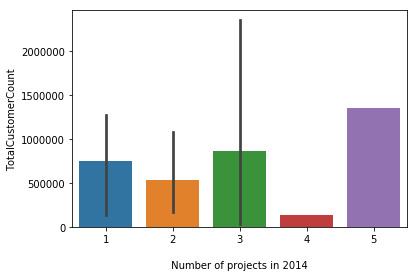

In [14]:
ax = sns.barplot(data=data_commun_counts_projectId0, x='Count', y='TotalCustomerCount')
ax.set(xlabel='\n Number of projects in 2014 ')

In [15]:
data_commun_average_projectId0 = agg_avg(data_commun_projectId0, 'Month of PeriodEndDate','TotalCustomerCount')
data_commun_average_projectId0.head()

,Month of PeriodEndDate,Avg TotalCustomerCount
0,December,1.140031e+06
1,June,3.254672e+05
2,March,7.998162e+05
3,September,5.862764e+05


[Text(0.5,0,'\n Number of projects in 2014 ')]

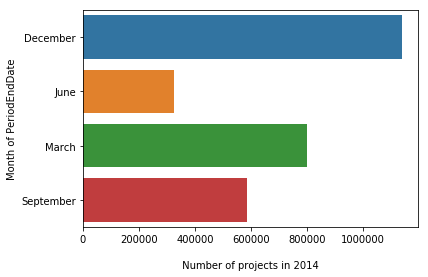

In [16]:
ax = sns.barplot(data=data_commun_average_projectId0, x='Avg TotalCustomerCount',y='Month of PeriodEndDate')
ax.set(xlabel='\n Number of projects in 2014 ')

* PIVOTER LES DONNÉES POUR PLUS DE DÉTAILS

Jusqu'à présent, nous avons regardé nos données à un niveau assez élevé, en les agrégeant par une seule variable.  Ensuite, nous allons aller plus loin en examinant deux ou trois variables à la fois. La façon dont nous allons faire cela est via les tableaux croisés dynamiques et leurs équivalents visuels, heatmaps pivot.

In [17]:
import numpy as np
def pivot_count(df, rows, columns, calc_field):
    df_pivot = df.pivot_table(values=calc_field, 
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.size
                             ).dropna(axis=0, how='all')
    return df_pivot

effic_size_pivot = pivot_count(data_commun_projectId0,'Year of PeriodEndDate','Month of PeriodEndDate',
                               'TotalCustomerCount')
effic_size_pivot.head()

Month of PeriodEndDate,December,June,March,September
Year of PeriodEndDate,,,,
2013.0,10.0,3.0,NaN,7.0
2014.0,4.0,3.0,NaN,7.0
2015.0,NaN,NaN,5.0,NaN


[Text(0.5,28.8,' Total Customer count')]

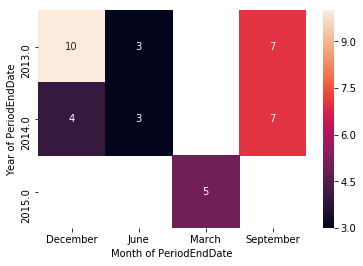

In [18]:
sns.heatmap(effic_size_pivot, annot=True, fmt='g')
ax.set(xlabel=' Total Customer count')


Avec ces heatmaps pivot, nous ne sommes pas limités à seulement deux variables. Nous pouvons passer une liste de variables pour n'importe lequel des axes (lignes ou colonnes), et il affichera toutes les différentes combinaisons de valeurs pour ces variables.

[Text(0.5,69,'Total Customer count')]

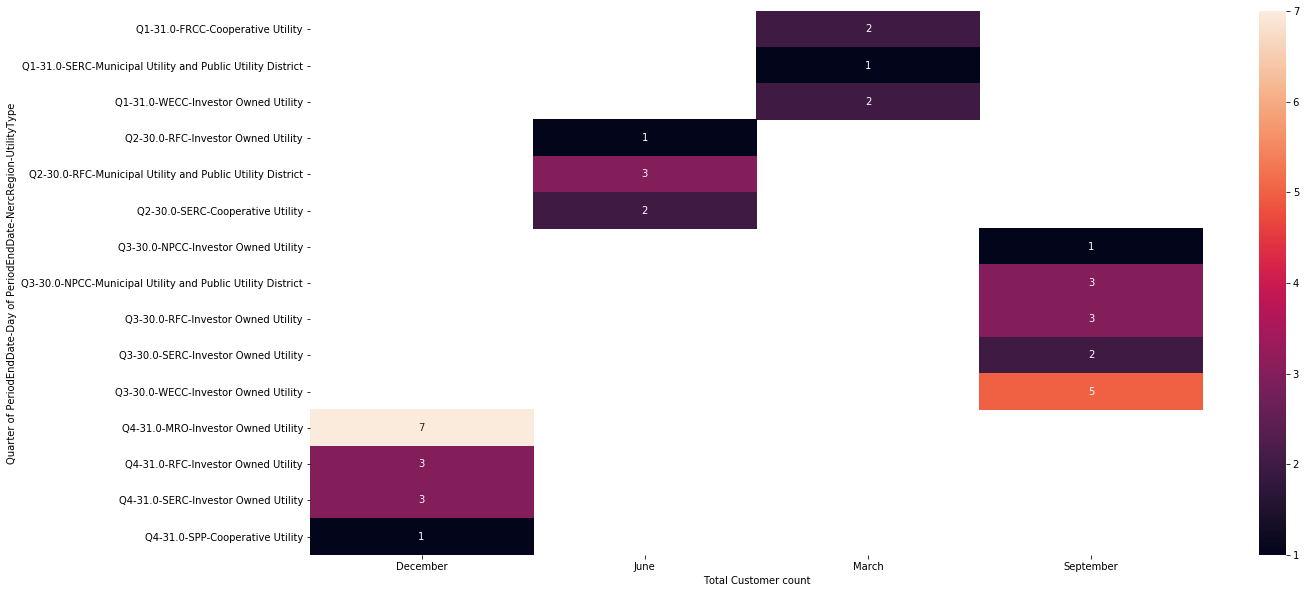

In [19]:
import matplotlib.pyplot as plt
effic_size_category = pivot_count(data_commun_projectId0,
                                  ['Quarter of PeriodEndDate','Day of PeriodEndDate','NercRegion','UtilityType'],
                                  'Month of PeriodEndDate','TotalCustomerCount')

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(effic_size_category, annot=True, fmt='g')
ax.set(xlabel='Total Customer count')


* VISUALISER LES CHANGEMENTS AU COURS DU TEMPS

Jusqu'à présent, nous avons explorer les données à des moments donnés dans le temps. L'étape suivante consiste à examiner comment les données ont évolué au fil du temps. Nous pouvons le faire relativement  en créant une fonction multi_line qui accepte une trame de données et des champs x / y, puis les trace sur un graphique multiligne.

In [20]:
def multi_line(df, x, y):
    ax = df.groupby([x, y]).size().unstack(y).plot(figsize=(15,8), cmap="Set2")

Alors, regardons comment le  TotalCustomerCount a évolué avec le temps

[Text(0.5,17.2,'\n Year')]

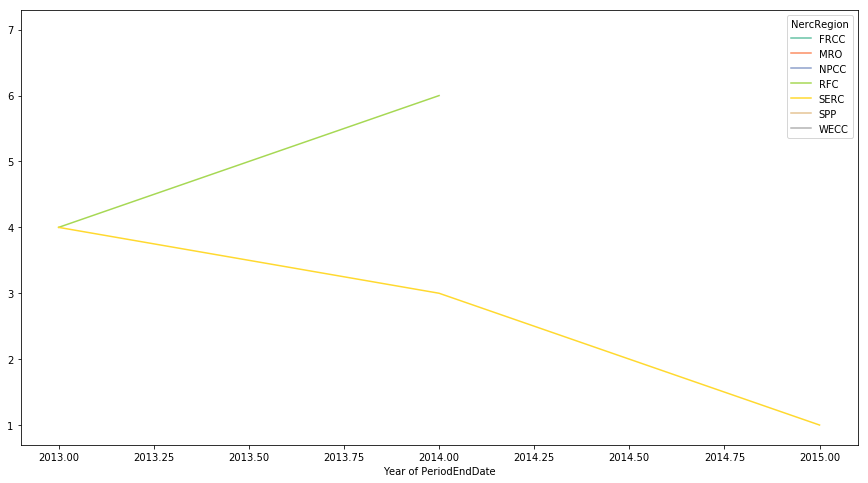

In [21]:
multi_line(data_commun_projectId0, 'Year of PeriodEndDate','NercRegion')
ax.set(xlabel='\n Year')


* EXPLORER LES RELATIONS ENTRE LES VARIABLES

La dernière façon dont nous allons explorer nos données  est en examinant les relations entre les variables numériques dans nos données. Cela nous permettra de mieux comprendre quels champs sont fortement corrélés, quelle est la nature de ces corrélations, quelles combinaisons de valeurs numériques existent dans nos données et quelles combinaisons sont des anomalies.


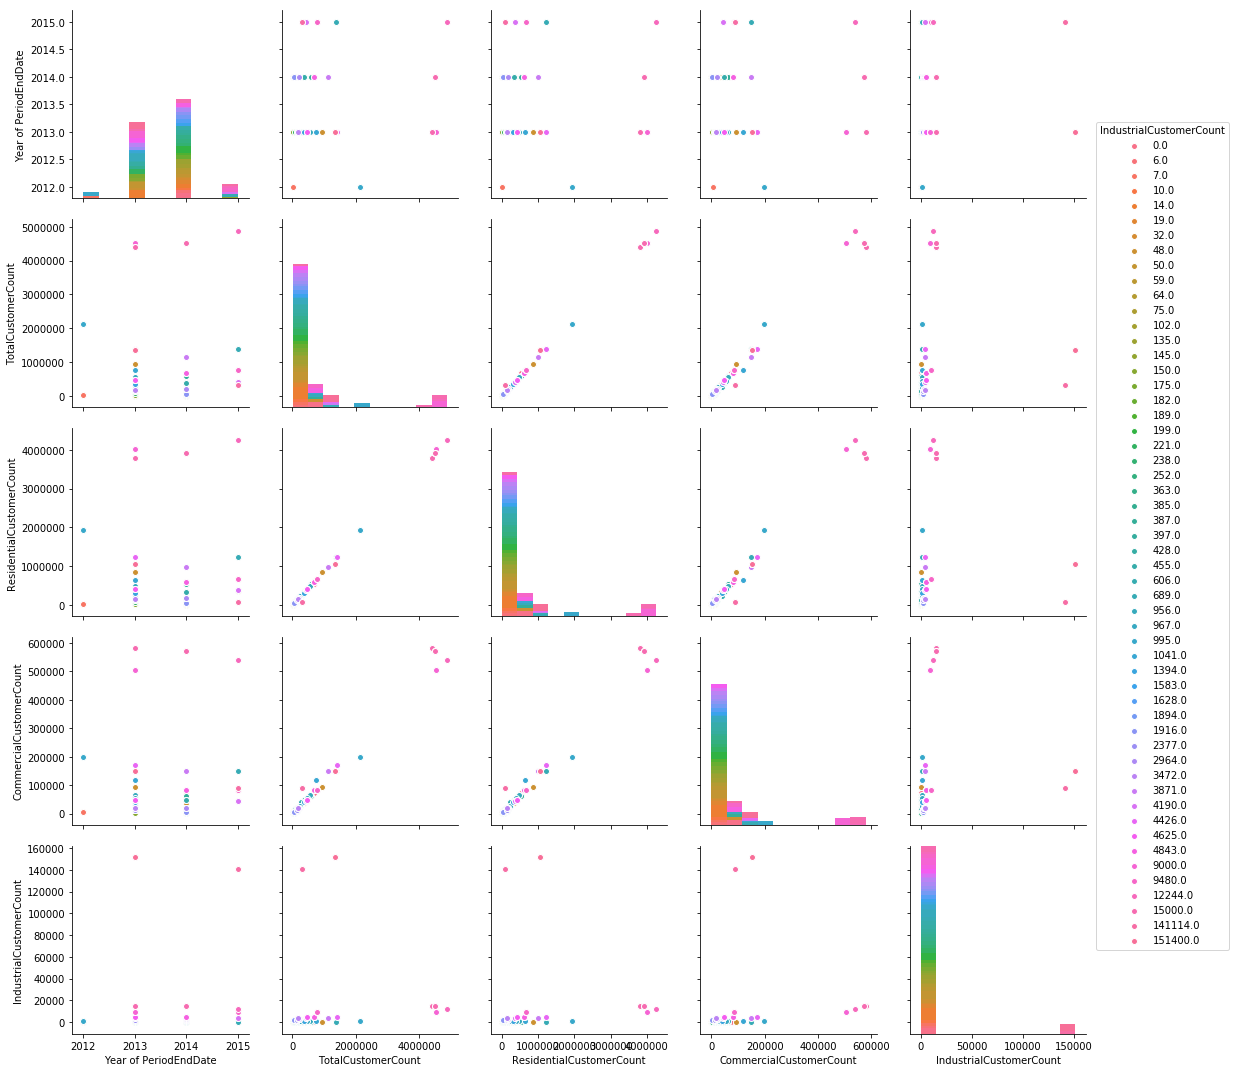

In [25]:
select_columns = ['ProjectId', 'Year of PeriodEndDate', 
                  'Month of PeriodEndDate', 
                  'NercRegion',  'TotalCustomerCount', 'ResidentialCustomerCount', 
               'CommercialCustomerCount', 'IndustrialCustomerCount']

sns.pairplot(data_commun[select_columns], hue='IndustrialCustomerCount', size=3)